<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Manipulation, EDA, and Reporting Results

_Authors: Joseph Nelson (DC), Sam Stack (DC)_

---

> **This lab is intentionally open-ended, and you're encouraged to answer your own questions about the dataset!**


### What makes a song a hit?

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. 

Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

**Provide (at least) a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?**

---

### Minimum Requirements

**At a minimum, you must:**

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

**You should strive to:**

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualizations

In [204]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Billboard data CSV:
billboard_csv = './datasets/billboard.csv'

# We need to use encoding='latin-1' to deal with non-ASCII characters.
df = pd.read_csv(billboard_csv, encoding='latin-1')

In [205]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,x11th.week,x12th.week,x13th.week,x14th.week,x15th.week,x16th.week,x17th.week,x18th.week,x19th.week,x20th.week,x21st.week,x22nd.week,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,x34th.week,x35th.week,x36th.week,x37th.week,x38th.week,x39th.week,x40th.week,x41st.week,x42nd.week,x43rd.week,x44th.week,x45th.week,x46th.week,x47th.week,x48th.week,x49th.week,x50th.week,x51st.week,x52nd.week,x53rd.week,x54th.week,x55th.week,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,x66th.week,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
df.describe()

,year,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,x11th.week,x12th.week,x13th.week,x14th.week,x15th.week,x16th.week,x17th.week,x18th.week,x19th.week,x20th.week,x21st.week,x22nd.week,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,x34th.week,x35th.week,x36th.week,x37th.week,x38th.week,x39th.week,x40th.week,x41st.week,x42nd.week,x43rd.week,x44th.week,x45th.week,x46th.week,x47th.week,x48th.week,x49th.week,x50th.week,x51st.week,x52nd.week,x53rd.week,x54th.week,x55th.week,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,x66th.week,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,244.000000,236.000000,222.000000,210.000000,204.000000,197.000000,182.000000,177.000000,166.000000,156.000000,146.000000,65.000000,55.000000,48.00000,46.000000,38.000000,36.00000,29.000000,24.000000,20.000000,20.000000,19.000000,18.000000,12.000000,10.000000,9.000000,9.000000,9.000000,8.000000,8.000000,7.000000,7.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,45.786885,45.474576,44.198198,44.352381,45.892157,47.898477,48.241758,51.265537,52.108434,53.166667,54.267123,26.184615,25.636364,23.81250,26.782609,26.131579,28.00000,27.344828,25.000000,23.650000,26.400000,28.736842,30.277778,23.166667,19.300000,16.888889,18.555556,20.888889,19.375000,20.250000,17.857143,18.571429,14.166667,17.666667,21.666667,17.800000,20.200000,22.800000,20.000000,22.000000,26.000000,29.250000,30.250000,33.250000,19.500000,21.500000,25.500000,27.50000,31.500000,35.500000,38.000000,42.500000,44.500000,47.500000,50.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,28.152357,29.060527,28.893100,29.481315,30.529936,31.542486,31.899476,33.093233,33.194199,33.022540,32.890475,20.232162,21.127798,18.23564,18.556716,18.737404,19.14904,19.736254,16.229335,15.239405,15.104548,16.002924,17.032169,17.071152,14.929836,12.333333,13.893444,15.799086,12.693502,18.289341,14.264508,15.306395,7.250287,10.366613,15.081998,11.691878,14.184499,16.543881,14.628739,16.062378,18.529256,18.997807,17.211914,17.095321,3.535534,0.707107,0.707107,2.12132,0.707107,4.949747,1.414214,0.707107,3.535534,3.535534,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,3.00000,3.000000,2.000000,1.00000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,4.000000,5.000000,5.000000,9.000000,3.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,5.000000,6.000000,8.000000,9.000000,10.000000,12.000000,15.000000,17.000000,17.000000,21.000000,25.000000,26.00000,31.000000,32.000000,37.000000,42.000000,42.000000,45.000000,50.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,24.750000,22.000000,20.250000,19.000000,20.000000,18.000000,17.000000,19.000000,19.000000,20.750000,22.250000,10.000000,9.000000,10.00000,12.000000,12.250000,13.75000,12.000000,14.500000,13.750000,16.000000,16.000000,14.500000,5.500000,5.750000,5.000000,6.000000,9.000000,9.000000,8.750000,13.000000,13.000000,11.500000,11.750000,10.750000,9.000000,7.000000,7.000000,8.75

In [207]:
df.tail()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,x11th.week,x12th.week,x13th.week,x14th.week,x15th.week,x16th.week,x17th.week,x18th.week,x19th.week,x20th.week,x21st.week,x22nd.week,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,x34th.week,x35th.week,x36th.week,x37th.week,x38th.week,x39th.week,x40th.week,x41st.week,x42nd.week,x43rd.week,x44th.week,x45th.week,x46th.week,x47th.week,x48th.week,x49th.week,x50th.week,x51st.week,x52nd.week,x53rd.week,x54th.week,x55th.week,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,x66th.week,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
df.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

In [209]:
df.columns = ['year', 'artist', 'track', 'time', 'genre', 'date_entered',
       'date_peaked', '1stweek', '2ndweek', '3rdweek', '4thweek',
       '5thweek', '6thweek', '7thweek', '8thweek', '9thweek',
       '10thweek', '11thweek', '12thweek', '13thweek', '14thweek',
       '15thweek', '16thweek', '17thweek', '18thweek', '19thweek',
       '20thweek', '21stweek', '22ndweek', '23rdweek', '24thweek',
       '25thweek', '26thweek', '27thweek', '28thweek', '29thweek',
       '30thweek', '31stweek', '32ndweek', '33rdweek', '34thweek',
       '35thweek', '36thweek', '37thweek', '38thweek', '39thweek',
       '40thweek', '41stweek', '42ndweek', '43rdweek', '44thweek',
       '45thweek', '46thweek', '47thweek', '48thweek', '49thweek',
       '50thweek', '51stweek', '52ndweek', '53rdweek', '54thweek',
       '55thweek', '56thweek', '57thweek', '58thweek', '59thweek',
       '60thweek', '61stweek', '62ndweek', '63rdweek', '64thweek',
       '65thweek', '66thweek', '67thweek', '68thweek', '69thweek',
       '70thweek', '71stweek', '72ndweek', '73rdweek', '74thweek',
       '75thweek', '76thweek']

In [210]:
df.head()

,year,artist,track,time,genre,date_entered,date_peaked,1stweek,2ndweek,3rdweek,4thweek,5thweek,6thweek,7thweek,8thweek,9thweek,10thweek,11thweek,12thweek,13thweek,14thweek,15thweek,16thweek,17thweek,18thweek,19thweek,20thweek,21stweek,22ndweek,23rdweek,24thweek,25thweek,26thweek,27thweek,28thweek,29thweek,30thweek,31stweek,32ndweek,33rdweek,34thweek,35thweek,36thweek,37thweek,38thweek,39thweek,40thweek,41stweek,42ndweek,43rdweek,44thweek,45thweek,46thweek,47thweek,48thweek,49thweek,50thweek,51stweek,52ndweek,53rdweek,54thweek,55thweek,56thweek,57thweek,58thweek,59thweek,60thweek,61stweek,62ndweek,63rdweek,64thweek,65thweek,66thweek,67thweek,68thweek,69thweek,70thweek,71stweek,72ndweek,73rdweek,74thweek,75thweek,76thweek
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
df.dtypes

year              int64
artist           object
track            object
time             object
genre            object
date_entered     object
date_peaked      object
1stweek           int64
2ndweek         float64
3rdweek         float64
4thweek         float64
5thweek         float64
6thweek         float64
7thweek         float64
8thweek         float64
9thweek         float64
10thweek        float64
11thweek        float64
12thweek        float64
13thweek        float64
14thweek        float64
15thweek        float64
16thweek        float64
17thweek        float64
18thweek        float64
19thweek        float64
20thweek        float64
21stweek        float64
22ndweek        float64
23rdweek        float64
24thweek        float64
25thweek        float64
26thweek        float64
27thweek        float64
28thweek        float64
29thweek        float64
30thweek        float64
31stweek        float64
32ndweek        float64
33rdweek        float64
34thweek        float64
35thweek        

In [212]:
df.describe()

,year,1stweek,2ndweek,3rdweek,4thweek,5thweek,6thweek,7thweek,8thweek,9thweek,10thweek,11thweek,12thweek,13thweek,14thweek,15thweek,16thweek,17thweek,18thweek,19thweek,20thweek,21stweek,22ndweek,23rdweek,24thweek,25thweek,26thweek,27thweek,28thweek,29thweek,30thweek,31stweek,32ndweek,33rdweek,34thweek,35thweek,36thweek,37thweek,38thweek,39thweek,40thweek,41stweek,42ndweek,43rdweek,44thweek,45thweek,46thweek,47thweek,48thweek,49thweek,50thweek,51stweek,52ndweek,53rdweek,54thweek,55thweek,56thweek,57thweek,58thweek,59thweek,60thweek,61stweek,62ndweek,63rdweek,64thweek,65thweek,66thweek,67thweek,68thweek,69thweek,70thweek,71stweek,72ndweek,73rdweek,74thweek,75thweek,76thweek
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,244.000000,236.000000,222.000000,210.000000,204.000000,197.000000,182.000000,177.000000,166.000000,156.000000,146.000000,65.000000,55.000000,48.00000,46.000000,38.000000,36.00000,29.000000,24.000000,20.000000,20.000000,19.000000,18.000000,12.000000,10.000000,9.000000,9.000000,9.000000,8.000000,8.000000,7.000000,7.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,45.786885,45.474576,44.198198,44.352381,45.892157,47.898477,48.241758,51.265537,52.108434,53.166667,54.267123,26.184615,25.636364,23.81250,26.782609,26.131579,28.00000,27.344828,25.000000,23.650000,26.400000,28.736842,30.277778,23.166667,19.300000,16.888889,18.555556,20.888889,19.375000,20.250000,17.857143,18.571429,14.166667,17.666667,21.666667,17.800000,20.200000,22.800000,20.000000,22.000000,26.000000,29.250000,30.250000,33.250000,19.500000,21.500000,25.500000,27.50000,31.500000,35.500000,38.000000,42.500000,44.500000,47.500000,50.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,28.152357,29.060527,28.893100,29.481315,30.529936,31.542486,31.899476,33.093233,33.194199,33.022540,32.890475,20.232162,21.127798,18.23564,18.556716,18.737404,19.14904,19.736254,16.229335,15.239405,15.104548,16.002924,17.032169,17.071152,14.929836,12.333333,13.893444,15.799086,12.693502,18.289341,14.264508,15.306395,7.250287,10.366613,15.081998,11.691878,14.184499,16.543881,14.628739,16.062378,18.529256,18.997807,17.211914,17.095321,3.535534,0.707107,0.707107,2.12132,0.707107,4.949747,1.414214,0.707107,3.535534,3.535534,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,3.00000,3.000000,2.000000,1.00000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,4.000000,5.000000,5.000000,9.000000,3.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,5.000000,6.000000,8.000000,9.000000,10.000000,12.000000,15.000000,17.000000,17.000000,21.000000,25.000000,26.00000,31.000000,32.000000,37.000000,42.000000,42.000000,45.000000,50.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,24.750000,22.000000,20.250000,19.000000,20.000000,18.000000,17.000000,19.000000,19.000000,20.750000,22.250000,10.000000,9.000000,10.00000,12.000000,12.250000,13.75000,12.000000,14.500000,13.750000,16.000000,16.000000,14.500000,5.500000,5.750000,5.000000,6.000000,9.000000,9.000000,8.750000,13.000000,13.000000,11.500000,11.750000,10.750000,9.000000,7.000000,7.000000,8.750000,9.000000,11.500000,13.500000,15.750000,19.250000,18.250000,21.250000,25.250000,26.75000,31.250000,33.750000,37.500000,42.250000,43.250000,46.250000

In [213]:
df.count() #there are 317 songs

year            317
artist          317
track           317
time            317
genre           317
date_entered    317
date_peaked     317
1stweek         317
2ndweek         312
3rdweek         307
4thweek         300
5thweek         292
6thweek         280
7thweek         269
8thweek         260
9thweek         253
10thweek        244
11thweek        236
12thweek        222
13thweek        210
14thweek        204
15thweek        197
16thweek        182
17thweek        177
18thweek        166
19thweek        156
20thweek        146
21stweek         65
22ndweek         55
23rdweek         48
24thweek         46
25thweek         38
26thweek         36
27thweek         29
28thweek         24
29thweek         20
30thweek         20
31stweek         19
32ndweek         18
33rdweek         12
34thweek         10
35thweek          9
36thweek          9
37thweek          9
38thweek          8
39thweek          8
40thweek          7
41stweek          7
42ndweek          6
43rdweek          6


In [214]:
df[df['1stweek'].isnull()] #all songs spent 1 week on the top 100

,year,artist,track,time,genre,date_entered,date_peaked,1stweek,2ndweek,3rdweek,4thweek,5thweek,6thweek,7thweek,8thweek,9thweek,10thweek,11thweek,12thweek,13thweek,14thweek,15thweek,16thweek,17thweek,18thweek,19thweek,20thweek,21stweek,22ndweek,23rdweek,24thweek,25thweek,26thweek,27thweek,28thweek,29thweek,30thweek,31stweek,32ndweek,33rdweek,34thweek,35thweek,36thweek,37thweek,38thweek,39thweek,40thweek,41stweek,42ndweek,43rdweek,44thweek,45thweek,46thweek,47thweek,48thweek,49thweek,50thweek,51stweek,52ndweek,53rdweek,54thweek,55thweek,56thweek,57thweek,58thweek,59thweek,60thweek,61stweek,62ndweek,63rdweek,64thweek,65thweek,66thweek,67thweek,68thweek,69thweek,70thweek,71stweek,72ndweek,73rdweek,74thweek,75thweek,76thweek


In [215]:
pd.set_option('display.max_rows', 500)
df.loc[:, df.isna().any()]

,2ndweek,3rdweek,4thweek,5thweek,6thweek,7thweek,8thweek,9thweek,10thweek,11thweek,12thweek,13thweek,14thweek,15thweek,16thweek,17thweek,18thweek,19thweek,20thweek,21stweek,22ndweek,23rdweek,24thweek,25thweek,26thweek,27thweek,28thweek,29thweek,30thweek,31stweek,32ndweek,33rdweek,34thweek,35thweek,36thweek,37thweek,38thweek,39thweek,40thweek,41stweek,42ndweek,43rdweek,44thweek,45thweek,46thweek,47thweek,48thweek,49thweek,50thweek,51stweek,52ndweek,53rdweek,54thweek,55thweek,56thweek,57thweek,58thweek,59thweek,60thweek,61stweek,62ndweek,63rdweek,64thweek,65thweek,66thweek,67thweek,68thweek,69thweek,70thweek,71stweek,72ndweek,73rdweek,74thweek,75thweek,76thweek
0,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,52.0,43.0,30.0,29.0,22.0,15.0,10.0,10.0,5.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,7.0,8.0,20.0,25.0,37.0,40.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,83.0,44.0,38.0,16.0,13.0,16.0,16.0,16.0,18.0,17.0,14.0,1.0,1.0,1.0,2.0,2.0,3.0,5.0,5.0,5.0,7.0,10.0,13.0,14.0,18.0,23.0,23.0,34.0,37.0,43.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,45.0,34.0,23.0,17.0,12.0,9.0,8.0,8.0,6.0,5.0,4.0,1.0,1.0,1.0,3.0,11.0,14.0,24.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,66.0,61.0,61.0,61.0,55.0,2.0,1.0,1.0,2.0,2.0,4.0,5.0,5.0,7.0,8.0,10.0,10.0,9.0,14.0,17.0,20.0,25.0,31.0,32.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,54.0,44.0,39.0,38.0,33.0,29.0,29.0,32.0,27.0,26.0,24.0,27.0,32.0,33.0,35.0,35.0,40.0,43.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,45.0,45.0,23.0,17.0,14.0,17.0,18.0,18.0,3.0,1.0,1.0,2.0,3.0,4.0,4.0,5.0,6.0,8.0,9.0,10.0,12.0,15.0,20.0,22.0,22.0,25.0,26.0,31.0,32.0,37.0,42.0,42.0,45.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
df[df['2ndweek'].isnull()] #5 songs spent dropped out after 1 week on the top 100, these were not very popular

,year,artist,track,time,genre,date_entered,date_peaked,1stweek,2ndweek,3rdweek,4thweek,5thweek,6thweek,7thweek,8thweek,9thweek,10thweek,11thweek,12thweek,13thweek,14thweek,15thweek,16thweek,17thweek,18thweek,19thweek,20thweek,21stweek,22ndweek,23rdweek,24thweek,25thweek,26thweek,27thweek,28thweek,29thweek,30thweek,31stweek,32ndweek,33rdweek,34thweek,35thweek,36thweek,37thweek,38thweek,39thweek,40thweek,41stweek,42ndweek,43rdweek,44thweek,45thweek,46thweek,47thweek,48thweek,49thweek,50thweek,51stweek,52ndweek,53rdweek,54thweek,55thweek,56thweek,57thweek,58thweek,59thweek,60thweek,61stweek,62ndweek,63rdweek,64thweek,65thweek,66thweek,67thweek,68thweek,69thweek,70thweek,71stweek,72ndweek,73rdweek,74thweek,75thweek,76thweek
271,2000,"Estefan, Gloria",No Me Dejes De Querer,3:25,Rock,2000-06-10,2000-06-10,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,2000,Anastacia,I'm Outta Love,4:01,Pop,2000-04-01,2000-04-01,92,NaN,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,2000,Master P,Souljas,3:33,Rap,2000-11-18,2000-11-18,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
df.max() #no songs spent more than 65 weeks on the top 100

year                       2000
artist          matchbox twenty
track                www.memory
time                       7:50
genre                      Rock
date_entered         2000-12-30
date_peaked          2000-12-30
1stweek                     100
2ndweek                     100
3rdweek                     100
4thweek                     100
5thweek                     100
6thweek                      99
7thweek                     100
8thweek                      99
9thweek                     100
10thweek                    100
11thweek                    100
12thweek                    100
13thweek                    100
14thweek                    100
15thweek                    100
16thweek                    100
17thweek                    100
18thweek                    100
19thweek                     99
20thweek                    100
21stweek                     97
22ndweek                    100
23rdweek                     91
24thweek                     91
25thweek

In [218]:
# Higher by Creed was the longest running song on the billboard Top 100, followed by Amazed by Lonestar
mask = df['62ndweek'].isnull() == False
df[['track', 'artist']][mask]

,track,artist
9,Amazed,Lonestar
46,Higher,Creed


In [219]:
mask = df['65thweek'].isnull() == False
df[['track', 'artist']][mask]

,track,artist
46,Higher,Creed


In [220]:
df.drop(columns=['66thweek', '67thweek', '68thweek', '69thweek',
       '70thweek', '71stweek', '72ndweek', '73rdweek', '74thweek',
       '75thweek', '76thweek'], inplace = True)
df.columns
#drop the all null columns after week 65

Index(['year', 'artist', 'track', 'time', 'genre', 'date_entered',
       'date_peaked', '1stweek', '2ndweek', '3rdweek', '4thweek', '5thweek',
       '6thweek', '7thweek', '8thweek', '9thweek', '10thweek', '11thweek',
       '12thweek', '13thweek', '14thweek', '15thweek', '16thweek', '17thweek',
       '18thweek', '19thweek', '20thweek', '21stweek', '22ndweek', '23rdweek',
       '24thweek', '25thweek', '26thweek', '27thweek', '28thweek', '29thweek',
       '30thweek', '31stweek', '32ndweek', '33rdweek', '34thweek', '35thweek',
       '36thweek', '37thweek', '38thweek', '39thweek', '40thweek', '41stweek',
       '42ndweek', '43rdweek', '44thweek', '45thweek', '46thweek', '47thweek',
       '48thweek', '49thweek', '50thweek', '51stweek', '52ndweek', '53rdweek',
       '54thweek', '55thweek', '56thweek', '57thweek', '58thweek', '59thweek',
       '60thweek', '61stweek', '62ndweek', '63rdweek', '64thweek', '65thweek'],
      dtype='object')

In [221]:
mask = df['year'].isnull() & df['track'].isnull() & df['artist'].isnull() & df['time'].isnull() & df['genre'].isnull() == True
df[mask]

#no null values in year, track, artist, time, or genre - let's graph

,year,artist,track,time,genre,date_entered,date_peaked,1stweek,2ndweek,3rdweek,4thweek,5thweek,6thweek,7thweek,8thweek,9thweek,10thweek,11thweek,12thweek,13thweek,14thweek,15thweek,16thweek,17thweek,18thweek,19thweek,20thweek,21stweek,22ndweek,23rdweek,24thweek,25thweek,26thweek,27thweek,28thweek,29thweek,30thweek,31stweek,32ndweek,33rdweek,34thweek,35thweek,36thweek,37thweek,38thweek,39thweek,40thweek,41stweek,42ndweek,43rdweek,44thweek,45thweek,46thweek,47thweek,48thweek,49thweek,50thweek,51stweek,52ndweek,53rdweek,54thweek,55thweek,56thweek,57thweek,58thweek,59thweek,60thweek,61stweek,62ndweek,63rdweek,64thweek,65thweek


In [222]:
df.dtypes

year              int64
artist           object
track            object
time             object
genre            object
date_entered     object
date_peaked      object
1stweek           int64
2ndweek         float64
3rdweek         float64
4thweek         float64
5thweek         float64
6thweek         float64
7thweek         float64
8thweek         float64
9thweek         float64
10thweek        float64
11thweek        float64
12thweek        float64
13thweek        float64
14thweek        float64
15thweek        float64
16thweek        float64
17thweek        float64
18thweek        float64
19thweek        float64
20thweek        float64
21stweek        float64
22ndweek        float64
23rdweek        float64
24thweek        float64
25thweek        float64
26thweek        float64
27thweek        float64
28thweek        float64
29thweek        float64
30thweek        float64
31stweek        float64
32ndweek        float64
33rdweek        float64
34thweek        float64
35thweek        

In [223]:
df['date_entered']= pd.to_datetime(df['date_entered'])
df['date_peaked']= pd.to_datetime(df['date_peaked'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 72 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          317 non-null    int64         
 1   artist        317 non-null    object        
 2   track         317 non-null    object        
 3   time          317 non-null    object        
 4   genre         317 non-null    object        
 5   date_entered  317 non-null    datetime64[ns]
 6   date_peaked   317 non-null    datetime64[ns]
 7   1stweek       317 non-null    int64         
 8   2ndweek       312 non-null    float64       
 9   3rdweek       307 non-null    float64       
 10  4thweek       300 non-null    float64       
 11  5thweek       292 non-null    float64       
 12  6thweek       280 non-null    float64       
 13  7thweek       269 non-null    float64       
 14  8thweek       260 non-null    float64       
 15  9thweek       253 non-null    float64   

In [224]:

df.time.value_counts()
#.plot(kind  = 'bar', figsize = (17,10))
#mask = df.time >= '3:00'
#df[mask].describe()
#df.time

3:50    9
3:54    7
3:55    7
3:51    6
4:00    6
4:02    6
4:06    6
3:30    6
3:45    6
4:12    6
4:17    6
3:52    6
3:46    6
3:56    5
4:23    5
4:18    5
4:16    5
4:07    5
3:48    5
4:10    5
3:19    5
3:23    5
3:44    4
4:30    4
4:13    4
4:05    4
4:04    4
3:43    4
3:40    4
4:14    3
3:33    3
3:57    3
3:22    3
3:29    3
3:37    3
4:15    3
3:47    3
3:04    3
4:03    3
3:35    3
4:08    3
3:25    3
3:38    3
3:36    3
4:11    3
3:42    3
2:53    2
4:34    2
4:28    2
3:10    2
4:41    2
4:22    2
3:12    2
4:38    2
3:41    2
4:24    2
2:56    2
3:17    2
3:26    2
4:57    2
4:31    2
4:20    2
2:58    2
4:42    2
3:27    2
5:00    2
2:55    2
4:01    2
3:15    2
4:19    2
3:58    2
4:09    2
5:26    2
3:24    2
5:03    2
3:32    2
4:43    1
3:20    1
5:19    1
4:35    1
7:10    1
5:36    1
2:52    1
5:16    1
4:21    1
3:03    1
5:33    1
6:50    1
5:20    1
5:12    1
3:59    1
3:53    1
5:30    1
5:13    1
4:45    1
2:38    1
6:17    1
3:09    1
4:40    1
5:10    1


In [225]:
df.artist.value_counts()

Jay-Z                           5
Houston, Whitney                4
Dixie Chicks, The               4
Thomas, Carl                    3
SheDaisy                        3
Braxton, Toni                   3
Limp Bizkit                     3
Destiny's Child                 3
Lonestar                        3
Eminem                          3
Martin, Ricky                   3
Jackson, Alan                   3
Rimes, LeAnn                    3
N'Sync                          3
Spears, Britney                 3
Backstreet Boys, The            3
Sisqo                           3
Aguilera, Christina             3
Price, Kelly                    3
McGraw, Tim                     3
DMX                             3
Madonna                         2
Mya                             2
Creed                           2
Paisley, Brad                   2
Aaliyah                         2
Chesney, Kenny                  2
Brock, Chad                     2
3 Doors Down                    2
Eastsidaz, The

In [226]:
df.loc[df['artist'] == 'Eminem']

,year,artist,track,time,genre,date_entered,date_peaked,1stweek,2ndweek,3rdweek,4thweek,5thweek,6thweek,7thweek,8thweek,9thweek,10thweek,11thweek,12thweek,13thweek,14thweek,15thweek,16thweek,17thweek,18thweek,19thweek,20thweek,21stweek,22ndweek,23rdweek,24thweek,25thweek,26thweek,27thweek,28thweek,29thweek,30thweek,31stweek,32ndweek,33rdweek,34thweek,35thweek,36thweek,37thweek,38thweek,39thweek,40thweek,41stweek,42ndweek,43rdweek,44thweek,45thweek,46thweek,47thweek,48thweek,49thweek,50thweek,51stweek,52ndweek,53rdweek,54thweek,55thweek,56thweek,57thweek,58thweek,59thweek,60thweek,61stweek,62ndweek,63rdweek,64thweek,65thweek
31,2000,Eminem,The Real Slim Shady,4:42,Rap,2000-05-06,2000-06-24,70,32.0,20.0,16.0,11.0,7.0,6.0,4.0,5.0,4.0,8.0,9.0,16.0,30.0,49.0,68.0,83.0,88.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,2000,Eminem,Stan,5:26,Rap,2000-11-04,2000-12-02,78,67.0,57.0,57.0,51.0,51.0,51.0,57.0,55.0,70.0,69.0,77.0,88.0,93.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,2000,Eminem,The Way I Am,4:40,Rap,2000-08-26,2000-09-30,87,74.0,59.0,65.0,59.0,58.0,59.0,62.0,89.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
df.loc[df.artist == 'Jay-Z']

,year,artist,track,time,genre,date_entered,date_peaked,1stweek,2ndweek,3rdweek,4thweek,5thweek,6thweek,7thweek,8thweek,9thweek,10thweek,11thweek,12thweek,13thweek,14thweek,15thweek,16thweek,17thweek,18thweek,19thweek,20thweek,21stweek,22ndweek,23rdweek,24thweek,25thweek,26thweek,27thweek,28thweek,29thweek,30thweek,31stweek,32ndweek,33rdweek,34thweek,35thweek,36thweek,37thweek,38thweek,39thweek,40thweek,41stweek,42ndweek,43rdweek,44thweek,45thweek,46thweek,47thweek,48thweek,49thweek,50thweek,51stweek,52ndweek,53rdweek,54thweek,55thweek,56thweek,57thweek,58thweek,59thweek,60thweek,61stweek,62ndweek,63rdweek,64thweek,65thweek
57,2000,Jay-Z,I Just Wanna Love U (Give It 2 Me),3:50,Rap,2000-10-28,2000-12-30,58,45.0,35.0,26.0,23.0,19.0,14.0,14.0,13.0,11.0,12.0,12.0,12.0,15.0,15.0,19.0,24.0,28.0,29.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,2000,Jay-Z,Big Pimpin',3:55,Rap,2000-04-22,2000-07-08,69,52.0,39.0,33.0,28.0,25.0,25.0,23.0,20.0,19.0,21.0,18.0,20.0,20.0,26.0,29.0,35.0,33.0,41.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,2000,Jay-Z,Anything,3:41,Rap,2000-02-26,2000-03-11,72,58.0,55.0,55.0,63.0,74.0,86.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,2000,Jay-Z,Do It Again (Put Ya Hands Up),3:47,Rap,2000-01-15,2000-01-29,95,68.0,65.0,65.0,74.0,84.0,92.0,96.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,2000,Jay-Z,Hey Papi,3:40,Rap,2000-08-12,2000-10-07,98,100.0,98.0,94.0,83.0,83.0,80.0,78.0,76.0,77.0,85.0,91.0,93.0,88.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
df.loc[df.artist == 'Houston, Whitney']

,year,artist,track,time,genre,date_entered,date_peaked,1stweek,2ndweek,3rdweek,4thweek,5thweek,6thweek,7thweek,8thweek,9thweek,10thweek,11thweek,12thweek,13thweek,14thweek,15thweek,16thweek,17thweek,18thweek,19thweek,20thweek,21stweek,22ndweek,23rdweek,24thweek,25thweek,26thweek,27thweek,28thweek,29thweek,30thweek,31stweek,32ndweek,33rdweek,34thweek,35thweek,36thweek,37thweek,38thweek,39thweek,40thweek,41stweek,42ndweek,43rdweek,44thweek,45thweek,46thweek,47thweek,48thweek,49thweek,50thweek,51stweek,52ndweek,53rdweek,54thweek,55thweek,56thweek,57thweek,58thweek,59thweek,60thweek,61stweek,62ndweek,63rdweek,64thweek,65thweek
27,2000,"Houston, Whitney",My Love Is Your Love,4:16,Rock,1999-09-04,2000-01-08,81,68.0,44.0,16.0,11.0,9.0,8.0,7.0,8.0,7.0,8.0,8.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0,6.0,10.0,10.0,11.0,20.0,22.0,27.0,34.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,2000,"Houston, Whitney",I Learned From The Best,4:18,Rock,2000-02-19,2000-03-25,83,83.0,83.0,40.0,28.0,27.0,28.0,36.0,53.0,73.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,2000,"Houston, Whitney",Could I Have This Kiss Forever,3:54,Rock,2000-06-17,2000-08-05,74,68.0,68.0,67.0,59.0,59.0,60.0,52.0,54.0,56.0,59.0,70.0,69.0,81.0,87.0,95.0,98.0,100.0,NaN,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,2000,"Houston, Whitney","Same Script, Different Cast",4:45,Rock,2000-06-17,2000-07-15,71,71.0,71.0,71.0,70.0,75.0,77.0,88.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
(df.date_peaked - df.date_entered).describe()
#some songs come in at their peak, longest took 315 days.  Average time is 52 days to go peak.

count                        317
mean     52 days 05:54:19.305993
std      40 days 20:49:20.696756
min              0 days 00:00:00
25%             21 days 00:00:00
50%             49 days 00:00:00
75%             70 days 00:00:00
max            315 days 00:00:00
dtype: object

Text(0.5, 1.0, 'Range of How Long it Takes Songs to Peak')

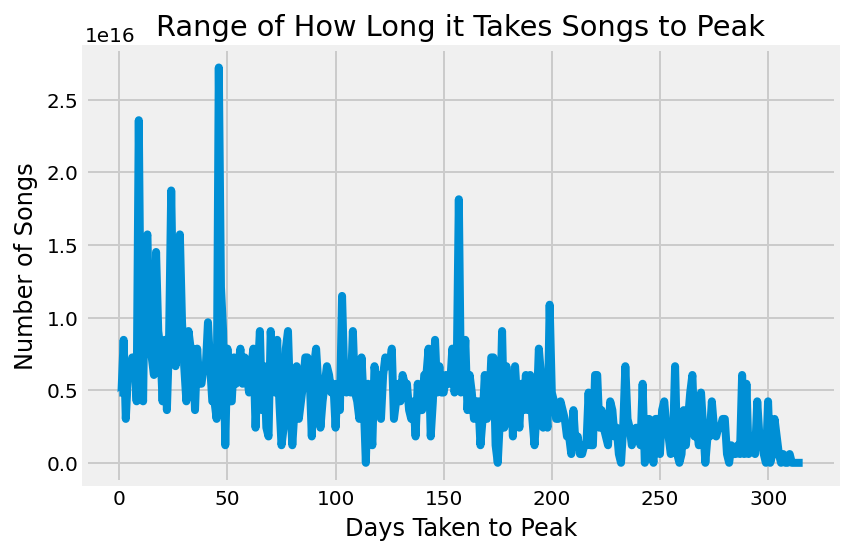

In [233]:
peaktime = (df.date_peaked - df.date_entered).plot(kind = 'line')
peaktime.set_xlabel('Days Taken to Peak')
peaktime.set_ylabel('Number of Songs')
peaktime.set_title('Range of How Long it Takes Songs to Peak')

In [230]:
df.loc[df.date_peaked == df.date_entered] #these songs did not grow in popularity

,year,artist,track,time,genre,date_entered,date_peaked,1stweek,2ndweek,3rdweek,4thweek,5thweek,6thweek,7thweek,8thweek,9thweek,10thweek,11thweek,12thweek,13thweek,14thweek,15thweek,16thweek,17thweek,18thweek,19thweek,20thweek,21stweek,22ndweek,23rdweek,24thweek,25thweek,26thweek,27thweek,28thweek,29thweek,30thweek,31stweek,32ndweek,33rdweek,34thweek,35thweek,36thweek,37thweek,38thweek,39thweek,40thweek,41stweek,42ndweek,43rdweek,44thweek,45thweek,46thweek,47thweek,48thweek,49thweek,50thweek,51stweek,52ndweek,53rdweek,54thweek,55thweek,56thweek,57thweek,58thweek,59thweek,60thweek,61stweek,62ndweek,63rdweek,64thweek,65thweek
114,2000,"Carey, Mariah",Crybaby,5:19,Rock,2000-06-24,2000-06-24,28,34.0,48.0,62.0,77.0,90.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,2000,Pearl Jam,Nothing As It Seems,5:20,Rock,2000-05-13,2000-05-13,49,70.0,84.0,89.0,93.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,2000,Nine Days,If I Am,4:18,Rock,2000-12-02,2000-12-02,68,68.0,81.0,94.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2000,Q-Tip,Breathe And Stop,4:06,Rock,2000-01-22,2000-01-22,71,71.0,81.0,82.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,2000,"Wallflowers, The",Sleepwalker,3:29,Rock,2000-10-28,2000-10-28,73,73.0,74.0,80.0,90.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,2000,"Clark, Terri",A Little Gasoline,3:07,Country,2000-12-16,2000-12-16,75,82.0,88.0,96.0,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,2000,"Estefan, Gloria",No Me Dejes De Querer,3:25,Rock,2000-06-10,2000-06-10,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,2000,"Hollister, Dave",Can't Stay,6:17,Rock,2000-03-25,2000-03-25,84,84.0,93.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,2000,En Vogue,Riddle,5:10,Rock,2000-06-17,2000-06-17,92,92.0,97.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,2000,Anastacia,I'm Outta Love,4:01,Pop,2000-04-01,2000-04-01,92,NaN,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
#df.describe(include='all').loc['mean']

df.loc[(df.date_peaked - df.date_entered) > '180 days']
#these songs peaked after 6 months 

,year,artist,track,time,genre,date_entered,date_peaked,1stweek,2ndweek,3rdweek,4thweek,5thweek,6thweek,7thweek,8thweek,9thweek,10thweek,11thweek,12thweek,13thweek,14thweek,15thweek,16thweek,17thweek,18thweek,19thweek,20thweek,21stweek,22ndweek,23rdweek,24thweek,25thweek,26thweek,27thweek,28thweek,29thweek,30thweek,31stweek,32ndweek,33rdweek,34thweek,35thweek,36thweek,37thweek,38thweek,39thweek,40thweek,41stweek,42ndweek,43rdweek,44thweek,45thweek,46thweek,47thweek,48thweek,49thweek,50thweek,51stweek,52ndweek,53rdweek,54thweek,55thweek,56thweek,57thweek,58thweek,59thweek,60thweek,61stweek,62ndweek,63rdweek,64thweek,65thweek
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,39.0,38.0,33.0,29.0,29.0,32.0,27.0,26.0,24.0,27.0,32.0,33.0,35.0,35.0,40.0,43.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,45.0,45.0,23.0,17.0,14.0,17.0,18.0,18.0,3.0,1.0,1.0,2.0,3.0,4.0,4.0,5.0,6.0,8.0,9.0,10.0,12.0,15.0,20.0,22.0,22.0,25.0,26.0,31.0,32.0,37.0,42.0,42.0,45.0,50.0,NaN
13,2000,Creed,With Arms Wide Open,3:52,Rock,2000-05-13,2000-11-11,84,78.0,76.0,74.0,70.0,68.0,74.0,75.0,69.0,74.0,70.0,79.0,84.0,86.0,76.0,62.0,45.0,29.0,19.0,11.0,10.0,7.0,5.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,5.0,9.0,12.0,13.0,13.0,17.0,22.0,26.0,28.0,37.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,81,70.0,68.0,67.0,66.0,57.0,54.0,53.0,51.0,51.0,51.0,51.0,47.0,44.0,38.0,28.0,22.0,18.0,18.0,14.0,12.0,7.0,6.0,6.0,6.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,5.0,9.0,9.0,15.0,14.0,13.0,14.0,16.0,17.0,21.0,22.0,24.0,28.0,33.0,42.0,42.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2000,Joe,I Wanna Know,4:57,Rock,2000-01-01,2000-07-01,94,86.0,69.0,50.0,41.0,33.0,32.0,28.0,28.0,27.0,27.0,25.0,23.0,20.0,17.0,15.0,14.0,11.0,11.0,14.0,11.0,11.0,10.0,12.0,10.0,6.0,4.0,5.0,4.0,5.0,5.0,7.0,6.0,8.0,5.0,6.0,9.0,9.0,8.0,14.0,16.0,20.0,32.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,81,77.0,73.0,63.0,61.0,58.0,56.0,52.0,56.0,57.0,57.0,57.0,57.0,57.0,60.0,61.0,61.0,57.0,60.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,41.0,34.0,28.0,25.0,23.0,22.0,16.0,16.0,18.0,14.0,13.0,13.0,11.0,11.0,9.0,9.0,7.0,7.0,9.0,9.0,12.0,14.0,16.0,17.0,17.0,21.0,26.0,29.0,32.0,39.0,39.0,43.0,47.0,50.0,50.0,49.0
157,2000,Amber,Sexual (Li Da Di),4:38,Rock,1999-07-17,2000-02-12,99,99.0,96.0,96.0,100.0,93.0,93.0,96.0,NaN,NaN,99.0,NaN,96.0,96.0,99.0,98.0,98.0,NaN,95.0,88.0,88.0,79.0,76.0,69.0,69.0,59.0,58.0,58.0,49.0,44.0,42.0,46.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Most Popular Genres on Billboard 100')

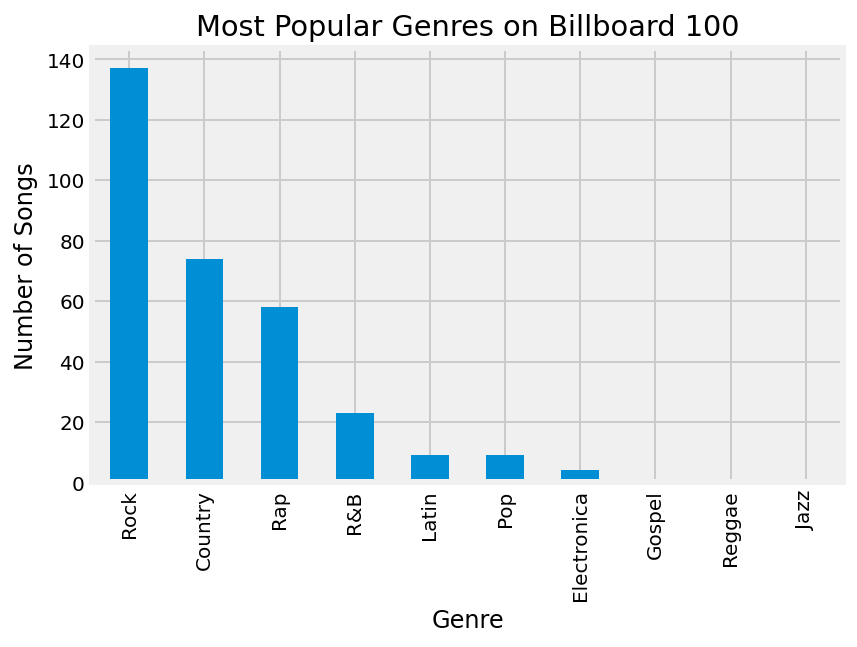

In [234]:
Genreplot = df.genre.value_counts().plot(kind = 'bar')
Genreplot.set_xlabel('Genre')
Genreplot.set_ylabel('Number of Songs')
Genreplot.set_title('Most Popular Genres on Billboard 100')
#rock songs were very popular

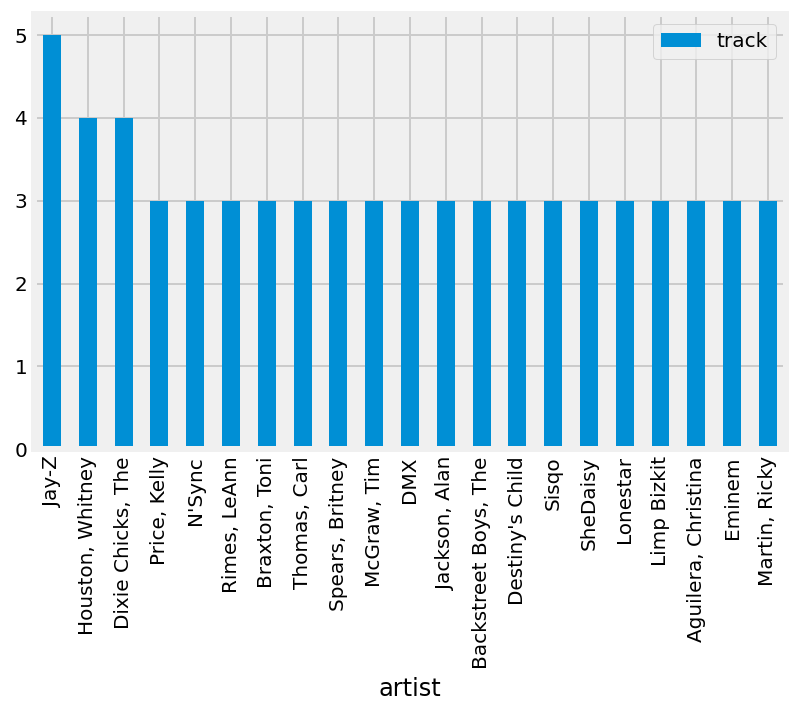

In [342]:
#grouped by artists to find the top artists on the billboard 
df.groupby('artist').track.count().reset_index().sort_values('track', ascending = False).head(21).plot(kind = 'bar', x = 'artist', y= 'track')

In [344]:
df[df.duplicated()]

,year,artist,track,time,genre,date_entered,date_peaked,1stweek,2ndweek,3rdweek,4thweek,5thweek,6thweek,7thweek,8thweek,9thweek,10thweek,11thweek,12thweek,13thweek,14thweek,15thweek,16thweek,17thweek,18thweek,19thweek,20thweek,21stweek,22ndweek,23rdweek,24thweek,25thweek,26thweek,27thweek,28thweek,29thweek,30thweek,31stweek,32ndweek,33rdweek,34thweek,35thweek,36thweek,37thweek,38thweek,39thweek,40thweek,41stweek,42ndweek,43rdweek,44thweek,45thweek,46thweek,47thweek,48thweek,49thweek,50thweek,51stweek,52ndweek,53rdweek,54thweek,55thweek,56thweek,57thweek,58thweek,59thweek,60thweek,61stweek,62ndweek,63rdweek,64thweek,65thweek


Description of Top Billboard Data 2000 Lab

In this lab I cleaned the column names to remove the ".".  
I then used .describe() and saw there are many NaN values, especially after the 65th week.
I dropped the columns for after 65weeks.
I used the isnull() to find how many songs only stayed on the chart for a week.
Those songs are: Gloria Estefan - No Me Dejes De Querer, anastacia - I'm Outta Love,
Master P - Souljas, Ghostface Killah - Cherchez LaGhost, and Fragma - Toca's Miracle.
The longest running song for 65 weeks was Creed - Higher.  Lonestar - Amazed 
stayed on the chart for a 64 weeks.
I checked to make sure there were no null values in the year, track, artist, 
time, and genre.
I changed the datatypes for date_entered and date_peaked to datetime.
I performed a value_counts on the length of songs using the time column.
I looked to see which artists were on the chart the most number of times.
Eminem is one of those artists and his songs The Real Slim Shady, Stan, and The Way I am
were on the billboard.
Jay-Z has the highest number of songs (5) with I just Wanna Love U, Big Pimpin, Anything, Do It Again, and Hey Papi
Whitney Houston had 4 songs: My Love is Your Love, I Learned From The Best, Could I Have this Kiss Forever, Same Script, Different Cast
I graphed a range of how long it takes songs to reach their peak ranking.
The mean is 52 days, some peak on their first day, and the max is 315 days.
I listed the songs that peaked on their first day of being on the chart.
I listed songs that spent over 180 days before peaking
I graphed the most popular genres - Rock is the most popular followed by Country. 
I graphed the artists that had over 3 hits on the chart
The data has no duplicates.
I would use this data to determine which songs to play as a DJ on the radio.